# Bayesian Probabilistic Modeling and Inference

### Marginal Probabilities, Conditional Probabilities, and Bayes' Rule

In [1]:
from pandas import *
import itertools
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as  plt
import scipy
import scipy.stats as stats
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['grid.linestyle'] = 'dotted'
plt.rcParams['grid.linewidth'] = .5

<mark>As a concrete scenario: imagine an epidemic outbreak. A new quick diagnostic test is developed. How good is the given diagnostic test (given that we also have access to the ground truth, i.e. dis- and dis+)? Counts out of 100 people who got the diagnostic test of the number who test negative vs. positive for the disease (rows) are crossed with the ground-truth counts of who do not have the disease, vs. those who do (columns).</mark>


##### marginal probablities (total N = 100):
|       | F.dis| T.dis |
| ------|----- | ----- |
| test- | 50   | 5     |
| test+ | 10   | 35    |


$P(F.dis) = \frac{50 + 10}{100} = .60 \ \ \ \ \ P(T.dis) = \frac{5 + 35}{100} = .40$

<mark>$P(test-) = \frac{50 + 5}{100} = .55 \ \ \ \ \  P(test+) = \frac{10 + 35}{100}= .45$</mark>



#### conditional probabilities:

|       | F.dis | T.dis |
| ------|-----  | ----- |
| test- | 0.50  | 0.05  |
| test+ | 0.10  | 0.35  |


$
P(test+\mid T.dis) = \frac{35}{35 + 5} = \frac{N(test+ \ \cap \ \ T.dis)}{N(T.dis)}
$

* <mark>Conditional probability of testing positive, given actually having the disease: number of
    T.dis cases that test-positive, divided by total number of T.dis cases.</mark>
* <mark>As  the probabilities are just the Ns each divided by the same total-N constant,
    the above is the same thing as:</mark>
    
    <mark>$P(test+ \mid T.dis) = \frac{0.35}{0.35 + 0.05} = \frac{P(test+ \ \cap \ T.dis)}{P(T.dis)}$</mark>
    
    
* By the same token, P(T.dis | test+) as, of the test+ cases (bottom row), the P(T.dis) over 
    the row total P:
    
    $
    P(T.dis\mid test+) = \frac{P(T.dis \ \cap \ test+)}{P(test+)} = \frac{0.35}{0.45} = 0.78
    $
    
    
    
#### Bayes' Rule:    

* <mark>Another way to get $P(T.dis \mid test+)$ :</mark>

    $
    P(T.dis\mid test+) = \frac{P(test+ \  \cap \ T.dis)}{P(test+)}
    $
    
    $
    P(test+ \mid T.dis) = \frac{P(test+ \  \cap \  T.dis)}{P(T.dis)}
    $
    
    For the second expression, multiplying by $P(T.dis)$ yields:
    
    $
    P(test+\cap \ T.dis) = P(test+ \mid T.dis) * P(T.dis)
    $
    
    Substituting the right-hand-side into the first expression's numerator:
    
    $
    P(T.dis \mid test+) = \frac{P(test+ \  \mid \ T.dis)\ * \  P(T.dis)}{P(test+)}
    $

* <mark>This result can be expressed more generally as Bayes' Rule for the distribution of probabilities across the possible values of a parameter (e.g., a population rate of disease), given the obtained data (e.g. a sample rate of disease) as:</mark>

    $$
    P(\theta \mid data) = \frac{P(data \  \mid \ \theta)\ * \  P(\theta)}{P(data)}
    $$
    
    
* <mark>$P(\theta \mid data)$ is the posterior distribution of probabilities across possible $\theta$ values.</mark>


* <mark>$P(\theta)$ is the prior distribution, i.e. the probabilities assigned to different $\theta$ outcomes "prior" to seeing any data.</mark>


* <mark>$P(data\mid \theta)$ is the likelihood function, or model for how data is probabilistically generated by different $\theta$ values.</mark>

* <mark>$P(data)$ is the marginal probability of the data (over all possible values of theta),</mark> or normalizing constant. It is the weighted sum of the likelihoods for the data across all possible $\theta$ values, with the weights being the prior probabilities that $\theta$ actually taking on the given value. I.e., to fully spell out the denominator:

    $\sum_{\theta}P(data \mid \theta) * P(\theta)$
   

Going back to the disease (parameter) and diagnostic-test (data) example:
    
|       | F.dis | T.dis |
| ------|------ | ----- |
| test- | 0.50  | 0.05  |
| test+ | 0.10  | 0.35  |

The marginal probability of a given "data" value, test+, is as intuitively worked out before the sum of the test+ probabilites over F.dis and T.dis; i.e., $P(test+) = .10 + .35 = .45$. This is equivalent to:


$
\sum_{dis}P(test+ \mid dis) * P(dis) =  P(test+ \mid T.dis) * P(T.dis) +  P(test+\mid F.dis) * P(F.dis) = \frac{P(test+ \  \cap \ T.dis)}{P(T.dis)} * P(T.dis) + \frac{P(test+ \  \cap \ F.dis)}{P(F.dis)} * P(F.dis) = P(test+ \cap \ T.dis) + P(test+ \cap \ F.dis) = 0.10 + 0.35 = 0.45
$


* <mark>In the Bayesian framework probabilities represent uncertainty degrees. Therefore we can speak of the "probability" distribution of possible $\theta$, i.e. population parameter values.</mark>

* <mark>Our main "target" in Bayesian inference is the inverse of $P(data \mid \theta)$</mark>. That is, having the data (knowing it with certainty), we want the probablity distribution of model parameter values, in terms of the likelihood that they gave rise to the given data, i.e. $P(\theta \mid data)$. So while the frequentist analysis treats a population mean as a fixed parameter, and therefore something that doesn't have a probability attached to it, <mark>in the Bayesian framework we can represent uncertainties regading what values the parameters take on in terms of probabilities.</mark>

        

### The Beta and Binomial Probability Distributions, and Conjugate Priors

#### The Beta Distribution

$P(\theta \ |\ a, b) \propto \theta^{a-1}(1 - \theta)^{b - 1}$

* Quite a variety of kinds of shapes, depending on a, b
* Normalizing constant as function of (a, b) makes the distribution integrate to 1.
* Uniform distribution has a = b = 1

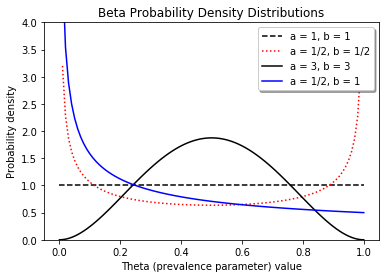

In [2]:
# plots of  beta  probability distributions, varying (a, b)
x = [x/100 for x in range(101)]
y1 = stats.beta.pdf(x, 1, 1)
y2 = stats.beta.pdf(x, 0.5, 0.5)
y3 = stats.beta.pdf(x, 3, 3)
y4 = stats.beta.pdf(x, 0.5, 1)
fig, ax = plt.subplots()
ax.plot(x, y1, 'k--', label = 'a = 1, b = 1')
ax.plot(x, y2, 'r:', label = 'a = 1/2, b = 1/2')
ax.plot(x, y3, 'k-', label = 'a = 3, b = 3')
ax.plot(x, y4, 'b-', label = 'a = 1/2, b = 1')
ax.set_ylim(0, 4)
ax.legend(loc='upper right', shadow = True)
ax.set_xlabel('Theta (prevalence parameter) value')
ax.set_ylabel('Probability density')
ax.set_title('Beta Probability Density Distributions')
plt.show()

#### The Binomial Distribution

<mark>If we have a (not necessarily fair) coin with a p chance of heads per flip, which gets flipped n times, and we assume that the flip outcomes are independent, the probability distribution for getting k heads is given by:</mark>

$P(X = k \ |\  p, n) = \binom n k p^k(1-p)^{n - k}$

<mark>The part following n-choose-k represents the probability of any given particular flip sequence with an outcome of k heads.</mark> For instance, if n = 5 and k = 3,  an example sequence of flips with an outcome of 3 heads is HHHTT. But THHHT, TTHHH, and seven other flip sequences, also satisfy X = 3. In general, <mark>$\binom n k = \frac{n!}{k!(n - k)!}$ yields the number of sequences satisfying k heads.</mark> 

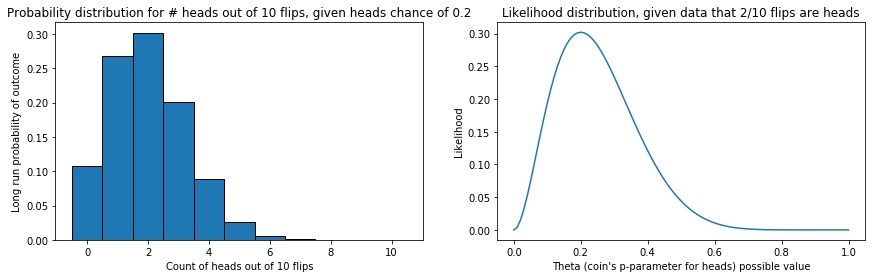

In [3]:
def binomial_fx(p_param, n_tot, n_hits):
    combos = math.factorial(n_tot)/(math.factorial(n_hits) * math.factorial(n_tot - n_hits))
    return combos * p_param**n_hits * (1 - p_param)**(n_tot - n_hits)

plt.subplot(1, 2, 1)
x = [x for x in range(11)]
pmf = stats.binom.pmf(x, n= 10, p = 0.2)
plt.bar(x, pmf, width = 1)
plt.xlabel('Count of heads out of 10 flips')
plt.ylabel('Long run probability of outcome')
plt.title('Probability distribution for # heads out of 10 flips, given heads chance of 0.2')

# not a prob. distr (no (nec) integration to 1)
# or, as params are  treated as what varies, L(theta|data) is 
# P(data|theta) times some theta-indep function of the (fixed) data
plt.subplot(1, 2, 2)
p_param_vals =  [x/100 for x in range(101)]
# now data is fixed (k = 2); p_param varies
likelihoods = [binomial_fx(p_param, 10, 2) for p_param in p_param_vals]
plt.plot(p_param_vals, likelihoods)
plt.xlabel('Theta (coin\'s p-parameter for heads) possible value')
plt.ylabel('Likelihood')
plt.title('Likelihood distribution, given data that 2/10 flips are heads')
plt.subplots_adjust(right = 2)
plt.show()



* <mark>The left figure keeps the parameter fixed (chance of heads per flip = 0.2) and varies the data (count of heads out of 10 flips)</mark>
* <mark>The right figure varies the heads-chance per flip (x-axis), and asks how relatively likely these different parameter-values are to generate a fixed data-value (2 out 10 flips)</mark>

#### Multiplying a Beta Probability Prior Distribution by a Binomial Likelihood Distribution

* $P(\theta \  | \  a, b) = Beta(a, b) \propto \theta^{a - 1}(1 - \theta)^{b \ - \ 1}$


* $P(data \ | \ \theta = Binomial(n, x) \propto \theta^x(1-\theta)^{n \  - \  x}$


* $P(\theta \ | \ data) \propto \theta^{a \  + \  x \ - \ 1}(1 - \theta)^{b\ +\ n \ - \  x\ -\ 1}$


* <mark>Therefore, the posterior probability distribution is a Beta distribution with "updated a" as a + x, and "updated b" as b + n - x; i.e. $P(\theta \ | \ data) \sim Beta(a + x, b + n - x)$</mark>


* <mark>The Beta prior distribution  is therefore a _conjugate prior_ for the Binomial likelihood function, since the resulting posterior distribution and the prior distribution are conjugates, i.e. of the same family (here, Beta). Therefore, assuming that the Beta distribution appropriately represents the posterior distribution allows a simple formulaic "updating" of the prior, to give quick and easy "access" to the posterior.</mark> Another example of a conjugate prior is the Normal distribution, which is conjugate to a Normal likelhoood function.

### Posterior Probablity Distribution for a Drug's Cure-Rate
A new drug is developed to treat a disease. <mark>Two independent samples each of size n = 10 are taken. The control group gets the old drug, which has uncertain effectiveness. The treatment group gets the new drug. 2 patients in the control group are cured. 6 patients in the treatment group are cured. We are interested in evaluating the probability that the new drug does better than the old drug.</mark>

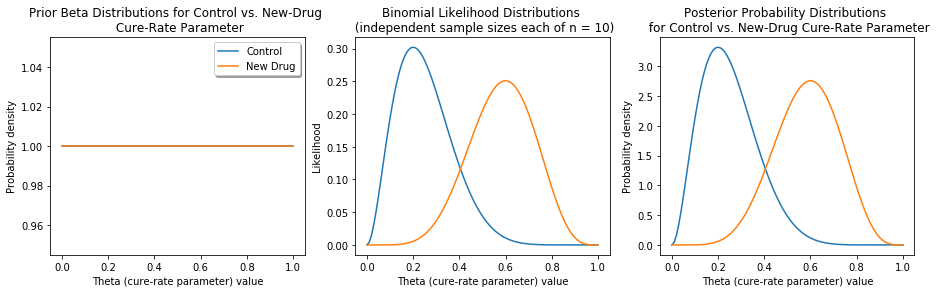

In [4]:
plt.subplot(1,3,1)
# prior for both
p_param_vals =  [x/100 for x in range(101)]
y_prior_c = stats.beta.pdf(p_param_vals, 1,1)
y_prior_a = stats.beta.pdf(p_param_vals, 1, 1)
plt.plot(p_param_vals, y_prior_c, label = 'Control')
plt.plot(p_param_vals, y_prior_a, label = 'New Drug')
plt.legend(loc='upper right', shadow = True)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Probability density')
plt.title('Prior Beta Distributions for Control vs. New-Drug \n Cure-Rate Parameter')

plt.subplot(1,3,2)
likelihoods_c = [binomial_fx(p_param, 10, 2) for p_param in p_param_vals]
likelihoods_a = [binomial_fx(p_param, 10, 6) for p_param in p_param_vals]
plt.plot(p_param_vals, likelihoods_c)
plt.plot(p_param_vals, likelihoods_a)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Likelihood')
plt.title('Binomial Likelihood Distributions \n (independent sample sizes each of n = 10)')

plt.subplot(1,3,3)
posterior_c = stats.beta.pdf(p_param_vals, 1 + 2, 1 + 10 - 2)
posterior_a = stats.beta.pdf(p_param_vals, 1 + 6, 1 + 10 - 6)
plt.plot(p_param_vals, posterior_c)
plt.plot(p_param_vals, posterior_a)
plt.title('Posterior Probability Distributions \n for Control vs. New-Drug Cure-Rate Parameter')
plt.ylabel('Probability density')
plt.xlabel('Theta (cure-rate parameter) value')
plt.subplots_adjust(left = 0, right = 2)

plt.show()

The prior distribution for both groups is Beta(a, b) = Beta(1, 1). For the control group, the posterior distribution is Beta(a + x, b + n - x) = Beta(1 + 2, 1 + 10 - 2). For the new-drug group, the posterior distribution is Beta(1 + 6, 1 + 10 - 6).

In [5]:
# for area of new-drug curve representing greater cure-rate values than control-curve:
def integ_est(x, y):
    interval = x[2] - x[1]
    return sum([interval * y[i] for i in range(len(y))])

len_x = len(p_param_vals)
xc = [n for n in p_param_vals if n > 0.4]
xa = [n for n in p_param_vals if n <= 0.4]
pdc = list(posterior_c)
pda = list(posterior_a)
pdc = pdc[len_x - len(xc) : len_x]
pda = pda[0:len(xa)]

round(1 - (integ_est(xc, pdc) + integ_est(xa, pda)), 2)



0.78

* <mark>Posterior distributions obtained by updating the prior Beta distribution for each group</mark> (control and new-drug) from Beta(a, b) to Beta(a + x, a + n - x), with x being the number in each group cured and n being the total number of patients in each group.
* <mark>The posterior probability disributions of the new-drug vs. control group suggest that the new drug has a 78% chance of being more effective (i.e., of having a higher cure-rate chance</mark> (analogue to chance for heads in a flip of its "coin", for each patient who takes the drug) than the control-drug.
* By comparison, a classical frequentist t-test would indicate $t_{18} = \frac{\hat{p}_{2} - \hat{p}_{1}}{\sqrt{p(1-p)(\frac{1}{n_2}+\frac{1}{n_1})}} = \frac{0.6 - 0.2}{\sqrt{.4(.6)(.2)}} = 1.83 \ $ with a corresponding p-value (two-tailed) of $0.08$. Under the frequentist framework, assuming there is no difference in the cure-rates for the new drug vs. the control drug, getting a difference in the two proportions in our data as high or higher than the one we got had an 8% chance of occurring.
* Bayesian inference is a natural way to make multiple comparisions (e.g., if we wanted to compare the effectiveness of 5 drugs).
* <mark>In the current example, the likelihood functions do all the work in generating the posterior distributions, since both prior distributions are uniform (uninformative).</mark>
* <mark>What if the doctor running the study had a prior view of the control drug as highly effective, based on anectdotal evidence or analysis (and therefore set the prior distribution as Beta(6, 1))?</mark>

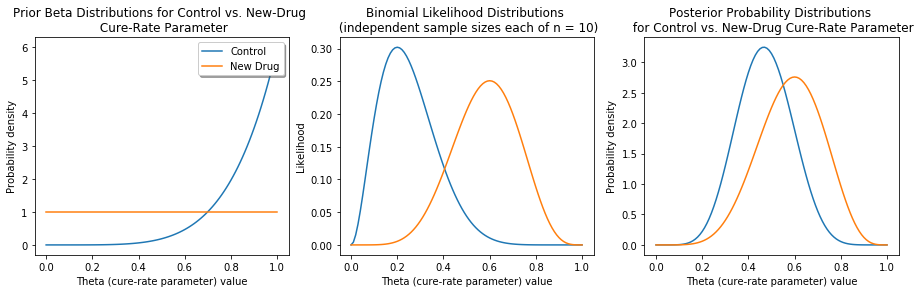

In [6]:
plt.subplot(1,3,1)
p_param_vals =  [x/100 for x in range(101)]
y_prior_c = stats.beta.pdf(p_param_vals, 6, 1)
y_prior_a = stats.beta.pdf(p_param_vals, 1, 1)
plt.plot(p_param_vals, y_prior_c, label = 'Control')
plt.plot(p_param_vals, y_prior_a, label = 'New Drug')
plt.legend(loc='upper right', shadow = True)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Probability density')
plt.title('Prior Beta Distributions for Control vs. New-Drug \n Cure-Rate Parameter')

plt.subplot(1,3,2)
likelihoods_c = [binomial_fx(p_param, 10, 2) for p_param in p_param_vals]
likelihoods_a = [binomial_fx(p_param, 10, 6) for p_param in p_param_vals]
plt.plot(p_param_vals, likelihoods_c)
plt.plot(p_param_vals, likelihoods_a)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Likelihood')
plt.title('Binomial Likelihood Distributions \n (independent sample sizes each of n = 10)')

plt.subplot(1,3,3)
posterior_c = stats.beta.pdf(p_param_vals, 6 + 2, 1 + 10 - 2)
posterior_a = stats.beta.pdf(p_param_vals, 1 + 6, 1 + 10 - 6)
plt.plot(p_param_vals, posterior_c)
plt.plot(p_param_vals, posterior_a)
plt.title('Posterior Probability Distributions \n for Control vs. New-Drug Cure-Rate Parameter')
plt.ylabel('Probability density')
plt.xlabel('Theta (cure-rate parameter) value')
plt.subplots_adjust(left = 0, right = 2)

plt.show()

Control: Beta(6, 1) -> Beta(6 + 2, 1 + 10 - 2) = Beta(8, 9)

New-Drug: Beta(1, 1) -> Beta(1 + 6, 1 + 10 - 6) = Beta(7, 5)

* <mark>The influence of the prior distribution for the control group on its posterior distribution is now quite significant. Now in the posterior distributions the separation between the new-drug and control group is much smaller.</mark>
* <mark>If instead of 10 participants in each group, we had 100, and obtained the same cure rates in the data</mark> (i.e., now 20/100 for the control group, and 60/100 for the new-drug group, the relative impact of the prior distributions diminish to virtually zero.
* More formally, if $P(\theta) = Beta(a, b), \ with \  E(\theta) = \frac{a}{a + b}, \ then \  P(\theta \ | \ x) = Beta(a + x, b + n - x), \ with \   E(\theta \ |\  x) = \frac{a + x}{a + b + n}$
* The latter can be rewritten as $E(\theta \ | \ x) = \frac{a}{a + b} \frac{a + b}{a + b + n} + \frac {x}{n} \frac{n}{a + b + n}$
    which is the mean of the prior distribution, times a weighting factor that shrinks its influence with greater n, added to  the maximum likelihood estimate for the likelihood function, times a weighting factor that increases its influence as n goes up relative to a and b).
* Therefore, <mark>as n, the sample size goes up, the data does more of the talking relative to the prior probability distribution in generating the posterior distribution.</mark>

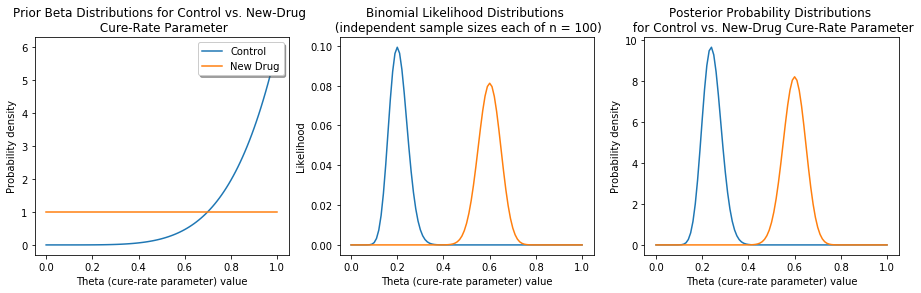

In [7]:
plt.subplot(1,3,1)
p_param_vals =  [x/100 for x in range(101)]
y_prior_c = stats.beta.pdf(p_param_vals, 6,1)
y_prior_a = stats.beta.pdf(p_param_vals, 1, 1)
plt.plot(p_param_vals, y_prior_c, label = 'Control')
plt.plot(p_param_vals, y_prior_a, label = 'New Drug')
plt.legend(loc='upper right', shadow = True)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Probability density')
plt.title('Prior Beta Distributions for Control vs. New-Drug \n Cure-Rate Parameter')

plt.subplot(1,3,2)
likelihoods_c = [binomial_fx(p_param, 100, 20) for p_param in p_param_vals]
likelihoods_a = [binomial_fx(p_param, 100, 60) for p_param in p_param_vals]
plt.plot(p_param_vals, likelihoods_c)
plt.plot(p_param_vals, likelihoods_a)
plt.xlabel('Theta (cure-rate parameter) value')
plt.ylabel('Likelihood')
plt.title('Binomial Likelihood Distributions \n (independent sample sizes each of n = 100)')

plt.subplot(1,3,3)
posterior_c = stats.beta.pdf(p_param_vals, 6 + 20, 1 + 100 - 20)
posterior_a = stats.beta.pdf(p_param_vals, 1 + 60, 1 + 100 - 60)
plt.plot(p_param_vals, posterior_c)
plt.plot(p_param_vals, posterior_a)
plt.title('Posterior Probability Distributions \n for Control vs. New-Drug Cure-Rate Parameter')
plt.ylabel('Probability density')
plt.xlabel('Theta (cure-rate parameter) value')
plt.subplots_adjust(left = 0, right = 2)

plt.show()

Control: Beta(6, 1) -> Beta(6 + 20, 1 + 100 - 20) = Beta(26, 81)

New-Drug: Beta(1, 1) -> Beta(1 + 60, 1 + 100 - 60) = Beta(61, 41)

# Creating Samples from the Posterior Probability Distribution

###  Approximate Bayesian Computation Algorithm:
1. <mark>Draw a prior probablity distribution parameter value:</mark>
2. <mark>Simulate data generation with that parameter:</mark>
3. <mark>If the simulated data match the observed (fixed) data (obtained empirically) the the paramater value is kept and counts in the posterior-distribution frequency sample; otherwise it is discarded</mark>
4. <mark>So in the end we have a frequency distribution of parameter-draws that resulted in our empirical data (serving as an approximation of the posterior distribution</mark>

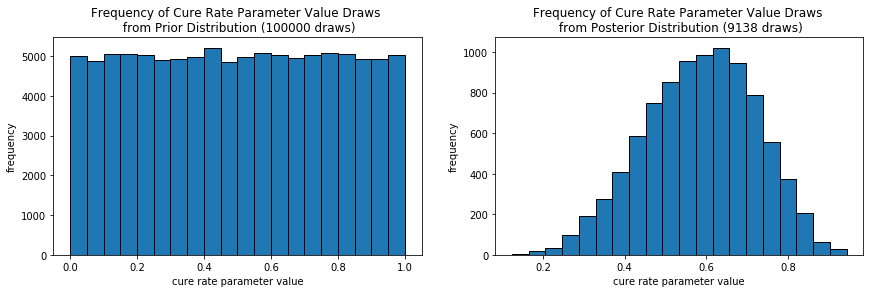

In [8]:
# First, 100,0000 draws from the prior (uniform) distribution are made
n_prior_samples = 100000

# actual sample data value (number of patients cured, in sample of 10) (fixed)
data = 6

np.random.seed(123)
prior_cureRate_pdist = Series(np.random.uniform(0, 1, size = n_prior_samples))

def data_simulator(cureRateParam_val):
    return (np.random.binomial(10, cureRateParam_val))

numberOfCuredPatients = []

# Simulating the data
for param_val in prior_cureRate_pdist:
    numberOfCuredPatients.append(data_simulator(param_val))


# Only the parameter draws (from the prior) that generate data matching our actual sample data are kept
boolean_filter = [k == data for k in numberOfCuredPatients]
posterior_cureRate_pdist = prior_cureRate_pdist[boolean_filter]

plt.subplot(1,2,1)
plt.hist(prior_cureRate_pdist, bins = 20)
plt.xlabel('cure rate parameter value')
plt.ylabel('frequency')
plt.title('Frequency of Cure Rate Parameter Value Draws \n from Prior Distribution ' +
          '(' + str(n_prior_samples) + ' draws)')

plt.subplot(1,2,2)
plt.hist(posterior_cureRate_pdist, bins = 20)
plt.xlabel('cure rate parameter value')
plt.ylabel('frequency')
plt.title('Frequency of Cure Rate Parameter Value Draws \n from Posterior Distribution ' + 
          '(' + str(len(posterior_cureRate_pdist)) + ' draws)')
plt.subplots_adjust(right = 2)
plt.show()